# 동물사진 10장 받아서 vgg16, vgg19, res50, res101, ensemble 돌리기

In [ ]:
# glob : 사진 여러장 for문 돌리려 할 때 유용
# up.keys를 통해 for문 돌릴 수도 있다

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

In [5]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving bear.jpg to bear.jpg
Saving crocodile.jpg to crocodile.jpg
Saving dolphin.jpg to dolphin.jpg
Saving eagle.jpg to eagle.jpg
Saving elephant.jpg to elephant.jpg
Saving hawk.jpg to hawk.jpg
Saving lion.jpg to lion.jpg
Saving penguin.jpg to penguin.jpg
Saving shark.jpg to shark.jpg
Saving sparrow.jpg to sparrow.jpg


In [20]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w :
        width, height = IMAGE_SIZE, (h*224)//w
    else :
        width, height = (w*224)//h, IMAGE_SIZE

    new_img = np.array(img.resize((width, height)))
    
    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]
    
    return final_img

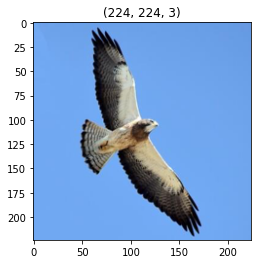

In [21]:
import matplotlib.pyplot as plt

hawk = Image.open('hawk.jpg')
hawk = center_image(hawk)
plt.imshow(hawk); plt.title(np.array(hawk).shape);

* vgg16

In [56]:
vgg16 = VGG16()

In [25]:
yhat = vgg16.predict(np.array(hawk).reshape(-1, 224, 224, 3))
label = decode_predictions(yhat)
yhat.shape, label

49152/35363 [=========================================] - 0s 0us/step


((1, 1000),
 [[('n01608432', 'kite', 0.97508043),
   ('n01817953', 'African_grey', 0.0076786648),
   ('n02058221', 'albatross', 0.0040227287),
   ('n02018795', 'bustard', 0.0032586555),
   ('n02051845', 'pelican', 0.002102041)]])

In [68]:
up.keys()

dict_keys(['bear.jpg', 'crocodile.jpg', 'dolphin.jpg', 'eagle.jpg', 'elephant.jpg', 'hawk.jpg', 'lion.jpg', 'penguin.jpg', 'shark.jpg', 'sparrow.jpg'])

In [66]:
fname.split('.')[0]

'sparrow'

In [58]:
vgg16_list = []

for fname in up.keys():
    img = Image.open(fname)
    img = center_image(img)
    yhat = vgg16.predict(np.array(img).reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    print(label[0][0][1], label[0][0][2])

    vgg16_list.append(label[0][0][1])

brown_bear 0.44639906
agama 0.28814763
dugong 0.2967015
kite 0.4125518
African_elephant 0.7254547
kite 0.97508043
lion 0.9994265
king_penguin 0.9998809
great_white_shark 0.79978675
quail 0.54715693


* vgg19

In [28]:
vgg19 = VGG19()

574726144/574710816 [==============================] - 5s 0us/step


In [59]:
vgg19_list = []

for fname in up.keys():
    img = Image.open(fname)
    img = center_image(img)
    yhat = vgg19.predict(np.array(img).reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    print(label[0][0][1], label[0][0][2])

    vgg19_list.append(label[0][0][1])

ice_bear 0.7137358
American_alligator 0.52270293
hammerhead 0.3340923
kite 0.55104434
African_elephant 0.81339055
kite 0.9935162
lion 0.9735855
king_penguin 0.99998975
great_white_shark 0.9854035
jay 0.8534195


* resnet50

In [30]:
res50 = ResNet50()

102981632/102967424 [==============================] - 1s 0us/step


In [65]:
res50_list = []

for fname in up.keys():
    img = Image.open(fname)
    img = center_image(img)
    yhat = res50.predict(np.array(img).reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    print(label[0][0][1], label[0][0][2])

    res50_list.append(label[0][0][1])

ice_bear 0.6684146
American_alligator 0.83444136
hammerhead 0.1308086
kite 0.41017535
African_elephant 0.84965014
screw 0.7957399
lion 0.89781463
king_penguin 0.9993678
great_white_shark 0.86663455
chickadee 0.22545663


* resnet101

In [32]:
res101 = ResNet101()

179658752/179648224 [==============================] - 2s 0us/step


In [61]:
res101_list = []

for fname in up.keys():
    img = Image.open(fname)
    img = center_image(img)
    yhat = res101.predict(np.array(img).reshape(-1, 224, 224, 3))
    label = decode_predictions(yhat)
    print(label[0][0][1], label[0][0][2])

    res101_list.append(label[0][0][1])

brown_bear 0.6741921
American_alligator 0.25878286
hammerhead 0.32151756
kite 0.82026994
African_elephant 0.92786515
kite 0.99492306
lion 0.47258928
king_penguin 0.9993026
great_white_shark 0.9236057
jay 0.24221118


* ensemble

In [62]:
ensemble_list = []

for fname in up.keys():
    img = Image.open(fname)
    img = center_image(img)
    yhat = (vgg16.predict(np.array(img).reshape(-1, 224, 224, 3)) +
           vgg19.predict(np.array(img).reshape(-1, 224, 224, 3)) +
           res50.predict(np.array(img).reshape(-1, 224, 224, 3)) +
           res101.predict(np.array(img).reshape(-1, 224, 224, 3))) / 4
    label = decode_predictions(yhat)
    print(label[0][0][1], label[0][0][2])

    ensemble_list.append(label[0][0][1])

ice_bear 0.43303686
American_alligator 0.46024472
hammerhead 0.23628333
kite 0.5485103
African_elephant 0.8290901
kite 0.7894725
lion 0.835854
king_penguin 0.9996353
great_white_shark 0.8938576
jay 0.336596


In [63]:
import pandas as pd

name = ['Bear', 'Crocodile', 'Dolphin', 'Eagle', 'Elephant', 'Hawk', 'Lion', 'Penguin', 'Shark', 'Sparrow']
df = pd.DataFrame({
    'Name' : name
})
df['VGG16'] = vgg16_list
df['VGG19'] = vgg19_list
df['ResNet50'] = res50_list
df['ResNet101'] = res101_list
df['Ensemble'] = ensemble_list
df

,Name,VGG16,VGG19,ResNet50,ResNet101,Ensemble
0,Bear,brown_bear,ice_bear,ice_bear,brown_bear,ice_bear
1,Crocodile,agama,American_alligator,American_alligator,American_alligator,American_alligator
2,Dolphin,dugong,hammerhead,hammerhead,hammerhead,hammerhead
3,Eagle,kite,kite,kite,kite,kite
4,Elephant,African_elephant,African_elephant,African_elephant,African_elephant,African_elephant
5,Hawk,kite,kite,screw,kite,kite
6,Lion,lion,lion,lion,lion,lion
7,Penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
8,Shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark
9,Sparrow,quail,jay,chickadee,jay,jay
